In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df_train = pd.read_csv('../input/titanic-solution-for-beginners-guide/train.csv')
df_test = pd.read_csv('../input/titanic-solution-for-beginners-guide/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.info()
print('_'*45)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
_____________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

## Precentage Of Null Values

In [6]:
print('Train Null Percentage: \n',(df_train.isnull().sum()/len(df_train)).round(3).sort_values(ascending=False))
print('-'*20)
print('Test Null Percentage: \n',(df_test.isnull().sum()/len(df_test)).round(3).sort_values(ascending=False))

Train Null Percentage: 
 Cabin          0.771
Age            0.199
Embarked       0.002
PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
dtype: float64
--------------------
Test Null Percentage: 
 Cabin          0.782
Age            0.206
Fare           0.002
PassengerId    0.000
Pclass         0.000
Name           0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Ticket         0.000
Embarked       0.000
dtype: float64


In [7]:
df_train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [8]:
df_test.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,1100.50,3.00,27.00,0.00,0.00,14.45
75%,1204.75,3.00,39.00,1.00,0.00,31.50
max,1309.00,3.00,76.00,8.00,9.00,512.33


## Handling Outlier

<AxesSubplot:xlabel='Fare', ylabel='Density'>

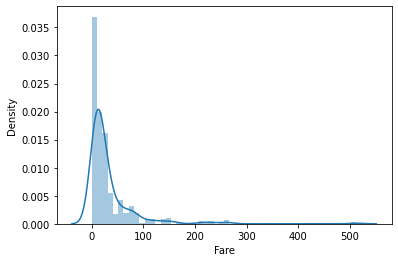

In [9]:
sns.distplot(df_train.Fare)

<AxesSubplot:xlabel='Fare'>

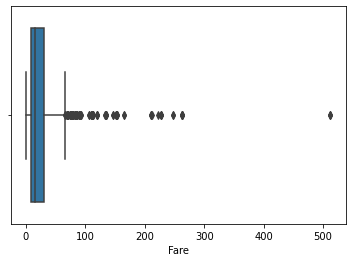

In [10]:
sns.boxplot(df_train.Fare)

In [11]:
IQR = df_train.Fare.quantile(.75) - df_train.Fare.quantile(.25)
lower_bound = df_train.Fare.quantile(.25) - (IQR * 1.5)
upper_bound = df_train.Fare.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(df_train.Fare.mean())

-26.724
65.6344
32.2042079685746


(None, None, None)

In [12]:
df_train.loc[df_train['Fare']>=66,'Fare']=66

<AxesSubplot:xlabel='Fare', ylabel='Density'>

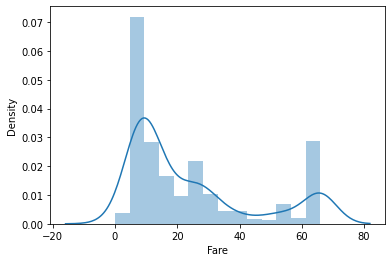

In [13]:
sns.distplot(df_train.Fare)

<AxesSubplot:xlabel='Fare'>

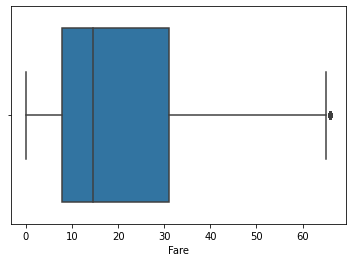

In [14]:
sns.boxplot(df_train.Fare)

## Fill Null Age Values By Grouping Sex and Pclass 

In [15]:
df_train['age'] = df_train.groupby(['Sex','Pclass'],as_index=False)['Age'].transform('mean').round()

In [16]:
df_train.age

0      27.0
1      35.0
2      22.0
3      35.0
4      27.0
       ... 
886    31.0
887    35.0
888    22.0
889    41.0
890    27.0
Name: age, Length: 891, dtype: float64

In [17]:
df_train.Age.fillna(df_train['age'],inplace=True)

## Handling Age Outlier

<AxesSubplot:xlabel='Age', ylabel='Density'>

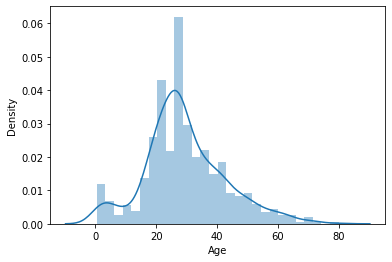

In [18]:
sns.distplot(df_train['Age'])

<AxesSubplot:xlabel='Age'>

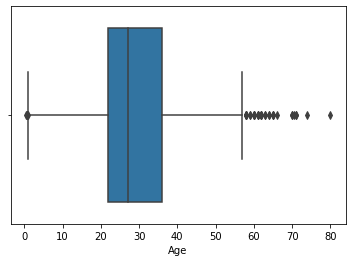

In [19]:
sns.boxplot(df_train.Age)

In [20]:
IQR = df_train.Age.quantile(.75) - df_train.Age.quantile(.25)
lower_bound = df_train.Age.quantile(.25) - (IQR * 1.5)
upper_bound = df_train.Age.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(df_train.Age.mean())

1.0
57.0
29.38290684624018


(None, None, None)

In [21]:
df_train.loc[df_train['Age']>=57,'Age']=57

<AxesSubplot:xlabel='Age', ylabel='Density'>

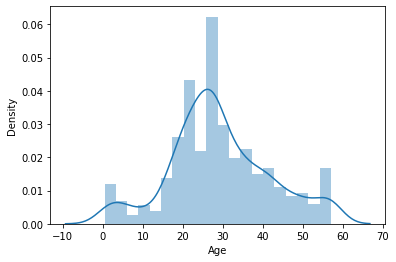

In [22]:
sns.distplot(df_train['Age'])

<AxesSubplot:xlabel='Age'>

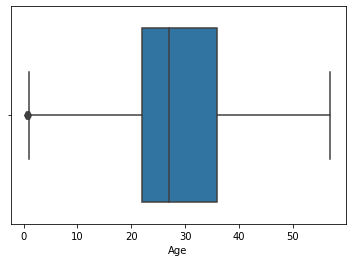

In [23]:
sns.boxplot(df_train.Age)

## EDA

In [24]:
df_train.groupby(['SibSp'],as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [25]:
df_train.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
df_train.groupby(['Sex'],as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
df_train.groupby(['Sex','Parch'],as_index=False)['Survived'].mean()

,Sex,Parch,Survived
0,female,0,0.788660
1,female,1,0.766667
2,female,2,0.612245
3,female,3,0.750000
4,female,4,0.000000
5,female,5,0.250000
6,female,6,0.000000
7,male,0,0.165289
8,male,1,0.327586
9,male,2,0.322581


In [28]:
df_train.groupby(['age'],as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,age,Survived
4,35.0,0.968085
2,29.0,0.921053
0,22.0,0.500000
5,41.0,0.368852
3,31.0,0.157407
1,27.0,0.135447


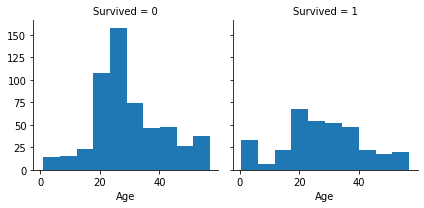

In [29]:
grid = sns.FacetGrid(df_train,col='Survived')
grid.map(plt.hist,'Age')

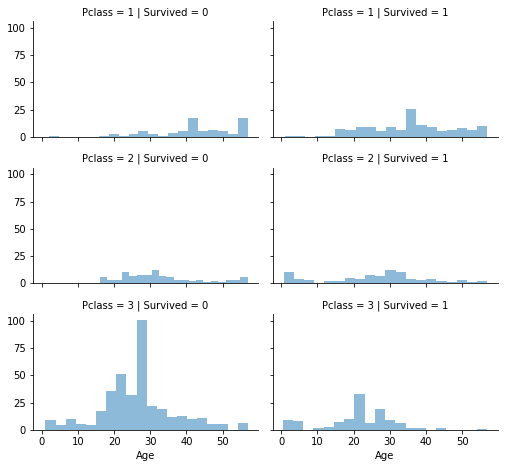

In [30]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

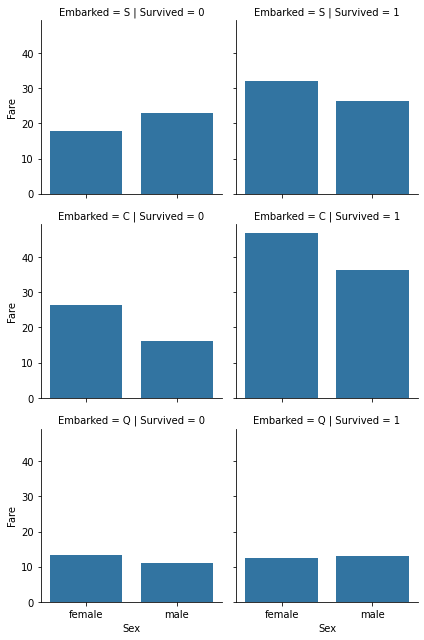

In [31]:
g = sns.FacetGrid(df_train,row='Embarked',col='Survived')
g.map(sns.barplot,'Sex','Fare',ci=None)

# Data Preprocessing 

In [32]:
concat = [df_train,df_test]
print('Before ', df_train.shape, df_test.shape, concat[0].shape, concat[1].shape)
df_train.drop(['age','Ticket', 'Cabin','PassengerId'],axis=1,inplace=True)
df_test.drop(['Ticket', 'Cabin','PassengerId'],axis=1, inplace=True)
print('After ',df_train.shape, df_test.shape, concat[0].shape, concat[1].shape)

Before  (891, 13) (418, 11) (891, 13) (418, 11)
After  (891, 9) (418, 8) (891, 9) (418, 8)


In [33]:
for i in concat:
    i['Title'] = i.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df_train['Title'],df_train['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [34]:
for i in concat:
    i['Title'] = i['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle',
                                    'Mme','Ms','Rev','Sir'],'Rare')
df_train.groupby(['Title'],as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.792000
1,Miss,0.697802
0,Master,0.575000
4,Rare,0.444444
2,Mr,0.156673


In [35]:
categ = {'Mrs':1,'Mr':2,'Miss':3,'Master':4,'Rare':5}
for i in concat:
    i['Title'] = i['Title'].map(categ)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.250,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,66.000,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.925,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.100,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.050,S,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.000,S,5
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.000,S,3
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,23.450,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.000,C,2


In [36]:
df_train.drop('Name',axis=1,inplace=True)

In [37]:
for i in concat:
    i['Sex'] = i['Sex'].replace({'male':0,'female':1})
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.250,S,2
1,1,1,1,38.0,1,0,66.000,C,1
2,1,3,1,26.0,0,0,7.925,S,3
3,1,1,1,35.0,1,0,53.100,S,1
4,0,3,0,35.0,0,0,8.050,S,2


In [38]:
for i in concat:
    i['FamilySize'] = i['SibSp'] + i['Parch'] + 1

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [39]:
for i in concat:
    i['Alone'] = 0
    i.loc[i['FamilySize'] == 1, 'Alone']=1
df_train.groupby(['Alone'],as_index=False)['Survived'].mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [40]:
df_train = df_train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
concat = [df_train, df_test]

In [41]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,22.0,7.250,S,2,0
1,1,1,1,38.0,66.000,C,1,0
2,1,3,1,26.0,7.925,S,3,1
3,1,1,1,35.0,53.100,S,1,0
4,0,3,0,35.0,8.050,S,2,1


In [42]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
for i in concat:
    i['Embarked'] = i['Embarked'].fillna('S')
df_train.groupby(['Embarked'],as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [44]:
for i in concat:
    i['Embarked'] = i['Embarked'].replace({'S':1,'C':2,'Q':3})
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,22.0,7.250,1,2,0
1,1,1,1,38.0,66.000,2,1,0
2,1,3,1,26.0,7.925,1,3,1
3,1,1,1,35.0,53.100,1,1,0
4,0,3,0,35.0,8.050,1,2,1


## Handle Test Data

In [45]:
df_test.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
Fare         1
Embarked     0
Title        1
Alone        0
dtype: int64

In [46]:
df_test['age'] = df_test.groupby(['Sex','Pclass'],as_index=False)['Age'].transform('mean').round()

In [47]:
df_test.Age.fillna(df_test['age'],inplace=True)

In [48]:
df_test.drop(['Name','age'],axis=1,inplace=True)

In [49]:
df_test

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,0,34.5,7.8292,3,2.0,1
1,3,1,47.0,7.0000,1,1.0,0
2,2,0,62.0,9.6875,3,2.0,1
3,3,0,27.0,8.6625,1,2.0,1
4,3,1,22.0,12.2875,1,1.0,0
...,...,...,...,...,...,...,...
413,3,0,25.0,8.0500,1,2.0,1
414,1,1,39.0,108.9000,2,NaN,1
415,3,0,38.5,7.2500,1,2.0,1
416,3,0,25.0,8.0500,1,2.0,1


In [50]:
df_test.Fare.fillna(df_test['Fare'].mean(),inplace=True)

In [51]:
df_test.Title.fillna(df_test['Title'].mean(),inplace=True)

# Build Model

In [52]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.91

In [54]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

69.25

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.4

In [56]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.98

In [57]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.27

In [58]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.76

In [59]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.76

In [60]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

65.99

In [61]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron


53.98

In [62]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,97.76
8,Decision Tree,97.76
1,KNN,84.40
2,Logistic Regression,79.91
4,Naive Bayes,75.98
6,Stochastic Gradient Decent,71.27
0,Support Vector Machines,69.25
7,Linear SVC,65.99
5,Perceptron,53.98


In [63]:
random_forest.predict(df_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,